In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Raúl
import pandas as pd # Estructura y manipulación de datos
url='/content/drive/MyDrive/Machine Learning/Prueba 2/Anexo ET_demo_round_traces_2022.csv'
df = pd.read_csv(url, sep=";", encoding='utf-8')


/tmp/ipython-input-40-705487826.py:4: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=";", encoding='utf-8')


In [ ]:
#Sofia
url = '/content/drive/MyDrive/Fundamentos de machine learning/Anexo ET_demo_round_traces_2022.csv'
df = pd.read_csv(url, sep=";", encoding='utf-8')


In [ ]:
#Con esta linea de codigo podemos asegurarnos de que las variables a utilizar sean numericas
df['MatchAssists'] = pd.to_numeric(df['MatchAssists'], errors='coerce')
df['TimeAlive'] = pd.to_numeric(df['TimeAlive'], errors='coerce')
df['MatchHeadshots'] = pd.to_numeric(df['MatchHeadshots'], errors='coerce')
df['RoundKills'] = pd.to_numeric(df['RoundKills'], errors='coerce')

In [ ]:
# 3.1. Imputar NaN en columnas numéricas usando la media
import numpy as np # Programación vectorial
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

/tmp/ipython-input-42-1837726787.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


In [ ]:
# 3.2.En columnas categóricas rellenamos con el valor más frecuente
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

/tmp/ipython-input-43-3727136605.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-43-3727136605.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(mode_value, inplace=True)


In [ ]:
print("\nValores nulos por columna luego de añadir el valor segun la media:")
print(df.isnull().sum())


Valores nulos por columna luego de añadir el valor segun la media:
Unnamed: 0                     0
Map                            0
Team                           0
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    0
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAss

In [ ]:
# 1. Filtrar datos válidos
df['RoundWinner'] = df['RoundWinner'].astype(str).str.strip()
df = df[df['RoundWinner'].isin(['True', 'False'])].copy()
df['RoundWinner'] = df['RoundWinner'].map({'True': 1, 'False': 0})
df = df[df['AbnormalMatch'] == False]

# 2. Definir variables a agregar (sin RoundWinner porque no vamos a sumarla)
variables_a_agregar = {
    'RoundKills': 'sum',
    'RoundAssists': 'sum',
    'RoundHeadshots': 'sum',
    'RoundFlankKills': 'sum',
    'TimeAlive': 'mean',
    'RLethalGrenadesThrown': 'sum',
    'RNonLethalGrenadesThrown': 'sum',
    'RoundStartingEquipmentValue': 'mean',
}

# 3. Agrupar por MatchId y aplicar agregaciones
df_partida_agregado = df.groupby('MatchId').agg(variables_a_agregar).reset_index()

# 4. Renombrar columnas
df_partida_agregado = df_partida_agregado.rename(columns={
    'RoundKills': 'TotalKills',
    'RoundAssists': 'TotalRoundAssists_by_Match',
    'RoundHeadshots': 'TotalRoundHeadshots_by_Match',
    'RoundFlankKills': 'TotalRoundFlankKills_by_Match',
    'TimeAlive': 'TimeAlive_by_Match',
    'RLethalGrenadesThrown': 'TotalLethalGrenades_by_Match',
    'RNonLethalGrenadesThrown': 'TotalNonLethalGrenades_by_Match',
    'RoundStartingEquipmentValue': 'RoundEquipmentValue_by_Match',
})

# 5. Traer info del nivel partido y convertir MatchWinner a 0/1
df_info_partida = df[['MatchId', 'MatchWinner', 'Map', 'Team', 'AbnormalMatch']].drop_duplicates(subset=['MatchId']).copy()
df_info_partida['MatchWinner'] = df_info_partida['MatchWinner'].map({True:1, False:0})

# 6. Merge de los datos agregados con info del partido
df_final_partida = pd.merge(df_partida_agregado, df_info_partida, on='MatchId', how='left')

# 7. Ingeniería de características
df_final_partida['MatchValue'] = (df_final_partida['TotalKills'] +df_final_partida['TotalRoundAssists_by_Match'] +df_final_partida['TotalRoundFlankKills_by_Match'])
df_final_partida['MatchEfficencie'] = df_final_partida['TotalKills'] / (df_final_partida['TimeAlive_by_Match'] + 1)
df_final_partida['GrenadesImpact'] = (df_final_partida['TotalLethalGrenades_by_Match'] +df_final_partida['TotalNonLethalGrenades_by_Match'])

# 8. Selección de variables y target
X = df_final_partida[[
    'TotalRoundAssists_by_Match',
    'TotalRoundHeadshots_by_Match',
    'TimeAlive_by_Match',
    'MatchValue',
    'MatchEfficencie',
    'GrenadesImpact'
]].copy()

y = df_final_partida['MatchWinner']

print("Filas en X:", X.shape[0])
print("Filas en y:", y.shape[0])
print("¿Hay valores nulos en X?", X.isnull().any().any())
print("¿Hay valores nulos en y?", y.isnull().any())

# 9. División en entrenamiento y prueba (con stratify para mantener proporción)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Filas en X: 333
Filas en y: 333
¿Hay valores nulos en X? False
¿Hay valores nulos en y? False


In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

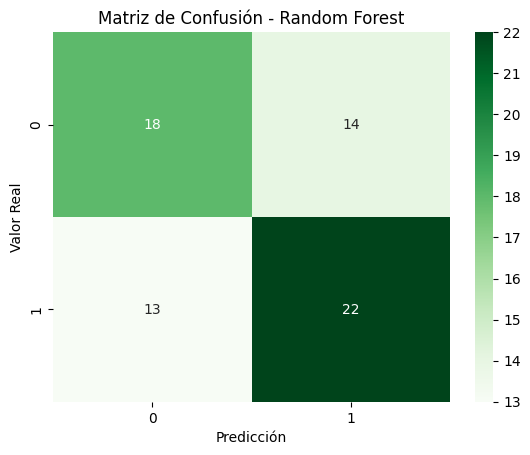

              precision    recall  f1-score   support

           0       0.58      0.56      0.57        32
           1       0.61      0.63      0.62        35

    accuracy                           0.60        67
   macro avg       0.60      0.60      0.60        67
weighted avg       0.60      0.60      0.60        67



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de confusión
matriz_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matriz_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

# Métricas
print(classification_report(y_test, y_pred_rf))

Precision: de todas las veces que el modelo predijo victoria (1), acertó el 61%. Y cuando predijo derrota (0), acertó el 58%.

Recall: de todas las veces que el resultado real fue victoria, el modelo identificó correctamente el 63% de ellas. Para las derrotas, acertó el 56%.

F1-score: combina precisión y recall en una sola métrica. En general, el modelo tiene un F1 moderado (~60%) para ambas clases, lo que indica que está razonablemente equilibrado.

Accuracy general: el modelo acierta en el 60% de los casos.

